In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
import nltk
nltk.download('stopwords')
from nltk.util import pr
stemmer = nltk.SnowballStemmer('english')
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv('./Depression_Text_Non_Class.csv')
df.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [4]:
df = df.sample(3000)

In [5]:
df = df[['text','class']]

In [6]:
df.head()

,text,class
54543,day 6 of giving free hugs hugs you will now re...,non-suicide
73566,Is that time in 2021!!!!! Happy Dump Trump Eve!,non-suicide
39861,I have almost no reasons to live at this point...,suicide
210209,Cant find any girls my type in my area Im an a...,non-suicide
223204,You are being sued because of your username. W...,non-suicide


In [7]:
df.groupby('class').describe()

text                                                            \
            count unique                                                top   
class                                                                         
non-suicide  1467   1467  day 6 of giving free hugs hugs you will now re...   
suicide      1533   1533  I have almost no reasons to live at this point...   

                  
            freq  
class             
non-suicide    1  
suicide        1

In [8]:
df['class'] = df['class'].apply(lambda x: 1 if x == 'suicide' else 0 )

In [9]:
df.groupby('class').describe()

text                                                               
      count unique                                                top freq
class                                                                     
0      1467   1467  day 6 of giving free hugs hugs you will now re...    1
1      1533   1533  I have almost no reasons to live at this point...    1

In [10]:
import re

In [11]:
def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]','',text)
  text = re.sub('https?://\S+|www\.\S+','',text)
  text = re.sub('<.*?>+','',text)
  text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
  text = re.sub('\n','',text)
  text = re.sub('\w*\d\w*','',text)
  text = [word for word in text.split(' ') if word not in stopword] 
  text = " ".join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text = " ".join(text)
  return text

df['text'] = df["text"].apply(clean)
print(df.head())

                                                     text  class
54543                       day  give free hug hug receiv      0
73566                          time  happi dump trump eve      0
39861   almost reason live point one still pain let go...      1
210209  cant find girl type area im averag look guy st...      0
223204                       su usernam  i'm su fresh  ok      0


### DecisionTreeClassifier

In [12]:
x = np.array(df['text'])
y = np.array(df['class'])

cv = CountVectorizer()
x = cv.fit_transform(x)
X_train , X_test , y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
y_pred = clf.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score , f1_score , precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay , RocCurveDisplay 
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test,name="Actual"),pd.Series(y_pred,name="Predicted")))
def get_metrics(y_test,y_predicted):
    accuracy = accuracy_score(y_test,y_predicted)
    precision = precision_score(y_test,y_predicted,average="weighted")
    recall = recall_score(y_test,y_predicted,average="weighted")
    f1 = f1_score(y_test,y_predicted,average="weighted")
    return accuracy , precision,recall,f1
acuracy,precision,recall,f1 = get_metrics(y_test,y_pred)
print("accuracy = %.3f \nprecision =%.3f \nrecall =%.3f \nf1 =%.3f" % (acuracy,precision,recall,f1))

Confusion matrix

Predicted    0    1
Actual             
0          351   76
1           91  382
accuracy = 0.814 
precision =0.815 
recall =0.814 
f1 =0.815


In [15]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test,name="Actual"),pd.Series(y_pred,name="Predicted")))
acuracy,precision,recall,f1 = get_metrics(y_test,y_pred)
print("accuracy = %.3f \nprecision =%.3f \nrecall =%.3f \nf1 =%.3f" % (acuracy,precision,recall,f1))

Confusion matrix

Predicted    0    1
Actual             
0          351   76
1           91  382
accuracy = 0.814 
precision =0.815 
recall =0.814 
f1 =0.815


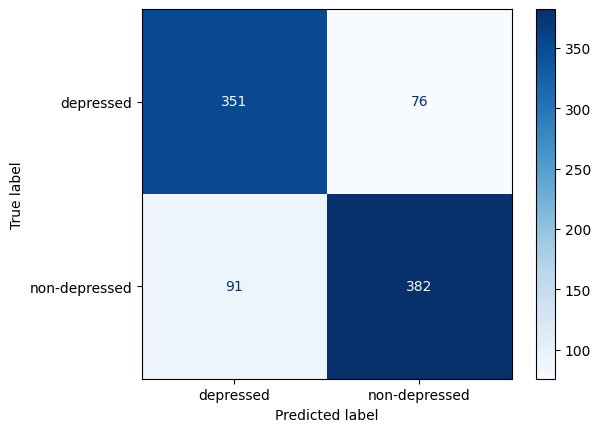

In [16]:
cm = confusion_matrix(y_test,y_pred)
cmp = ConfusionMatrixDisplay(cm,display_labels=['depressed','non-depressed'])
cmp = cmp.plot(cmap="Blues")
plt.show()

### multinomial naive Bayes

In [17]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha = 0.1)
clf.fit(X_train,y_train)

MultinomialNB(alpha=0.1)

In [18]:
y_pred = clf.predict(X_test)

In [19]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test,name="Actual"),pd.Series(y_pred,name="Predicted")))
acuracy,precision,recall,f1 = get_metrics(y_test,y_pred)
print("accuracy = %.3f \nprecision =%.3f \nrecall =%.3f \nf1 =%.3f" % (acuracy,precision,recall,f1))

Confusion matrix

Predicted    0    1
Actual             
0          322  105
1           26  447
accuracy = 0.854 
precision =0.865 
recall =0.854 
f1 =0.853


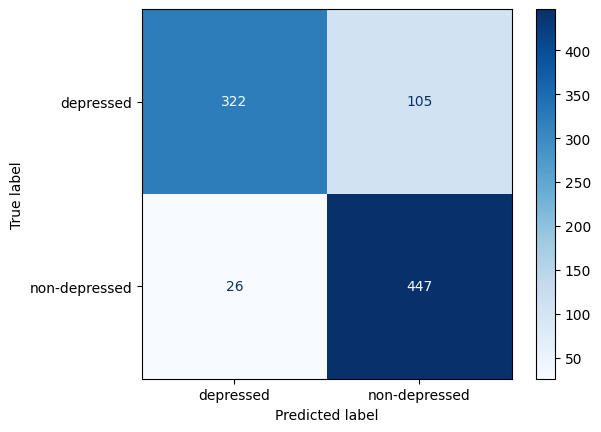

In [20]:
cm = confusion_matrix(y_test,y_pred)
cmp = ConfusionMatrixDisplay(cm,display_labels=['depressed','non-depressed'])
cmp = cmp.plot(cmap="Blues")
plt.show()

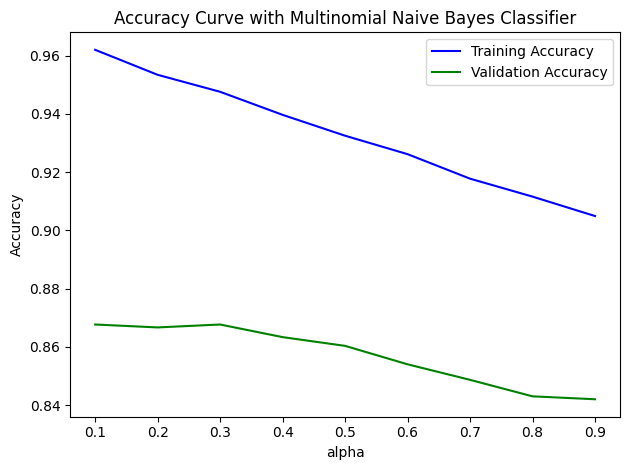

In [21]:
from sklearn.model_selection import validation_curve

parameter_range = np.arange(0.1, 1, 0.1)

train_score, test_score = validation_curve(MultinomialNB(), x, y,
                                       param_name = "alpha",
                                       param_range = parameter_range,
                                        cv = 5, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Accuracy", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Validation Accuracy", color = 'g')
 
# Creating the plot
plt.title("Accuracy Curve with Multinomial Naive Bayes Classifier")
plt.xlabel("alpha")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show() 

### KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric = 'minkowski',p = 2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [23]:
y_pred = classifier.predict(X_test)

In [24]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test,name="Actual"),pd.Series(y_pred,name="Predicted")))
acuracy,precision,recall,f1 = get_metrics(y_test,y_pred)
print("accuracy = %.3f \nprecision =%.3f \nrecall =%.3f \nf1 =%.3f" % (acuracy,precision,recall,f1))

Confusion matrix

Predicted    0    1
Actual             
0          402   25
1          214  259
accuracy = 0.734 
precision =0.789 
recall =0.734 
f1 =0.725


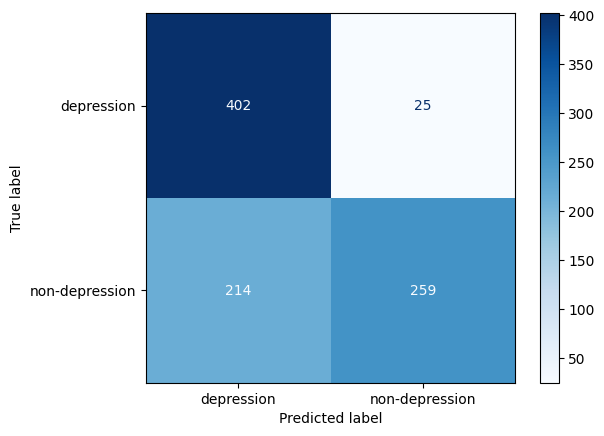

In [25]:
cm = confusion_matrix(y_test,y_pred)
cmp = ConfusionMatrixDisplay(cm,display_labels=['depression','non-depression'])
cmp = cmp.plot(cmap="Blues")
plt.show()

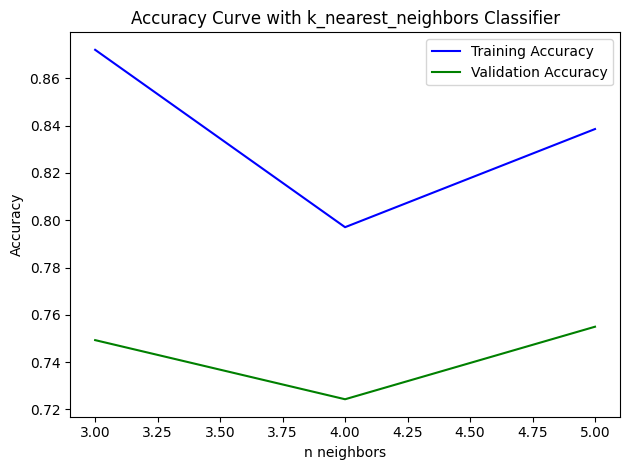

In [26]:
parameter_range = np.arange(3, 6, 1)

train_score, test_score = validation_curve(KNeighborsClassifier(metric = 'minkowski',p = 2), x, y,
                                       param_name = "n_neighbors",
                                       param_range = parameter_range,
                                        cv = 5, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Accuracy", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Validation Accuracy", color = 'g')
 
# Creating the plot
plt.title("Accuracy Curve with k_nearest_neighbors Classifier")
plt.xlabel("n neighbors")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show() 

### SVM

In [27]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state=0,probability=True)
classifier.fit(X_train,y_train)

SVC(probability=True, random_state=0)

In [28]:
y_pred = classifier.predict(X_test)

In [29]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test,name="Actual"),pd.Series(y_pred,name="Predicted")))
acuracy,precision,recall,f1 = get_metrics(y_test,y_pred)
print("accuracy = %.3f \nprecision =%.3f \nrecall =%.3f \nf1 =%.3f" % (acuracy,precision,recall,f1))

Confusion matrix

Predicted    0    1
Actual             
0          375   52
1          102  371
accuracy = 0.829 
precision =0.834 
recall =0.829 
f1 =0.829


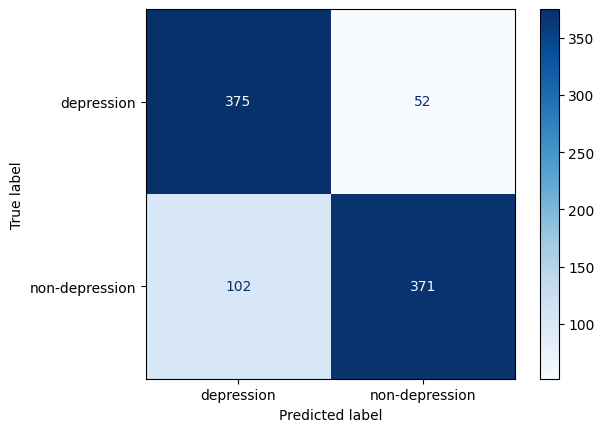

In [30]:
cm = confusion_matrix(y_test,y_pred)
cmp = ConfusionMatrixDisplay(cm,display_labels=['depression','non-depression'])
cmp = cmp.plot(cmap="Blues")
plt.show()

In [31]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10,criterion = 'entropy',random_state = 0)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [32]:
y_pred = classifier.predict(X_test)

In [33]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test,name="Actual"),pd.Series(y_pred,name="Predicted")))
acuracy,precision,recall,f1 = get_metrics(y_test,y_pred)
print("accuracy = %.3f \nprecision =%.3f \nrecall =%.3f \nf1 =%.3f" % (acuracy,precision,recall,f1))

Confusion matrix

Predicted    0    1
Actual             
0          359   68
1          110  363
accuracy = 0.802 
precision =0.806 
recall =0.802 
f1 =0.802


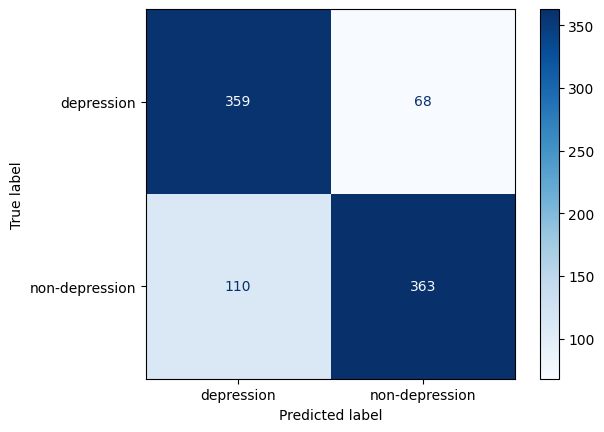

In [34]:
cm = confusion_matrix(y_test,y_pred)
cmp = ConfusionMatrixDisplay(cm,display_labels=['depression','non-depression'])
cmp = cmp.plot(cmap="Blues")
plt.show()

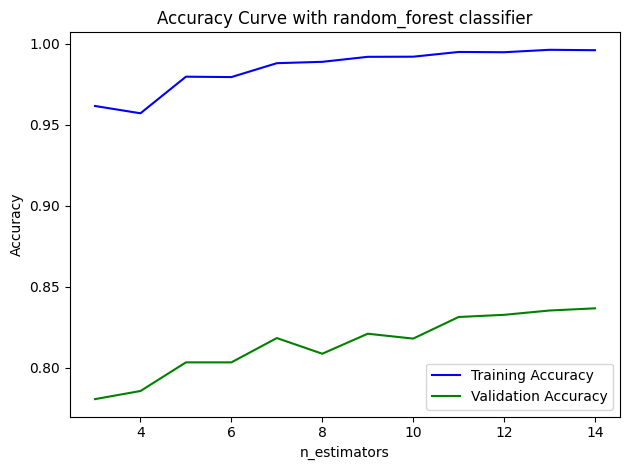

In [35]:
parameter_range = np.arange(3, 15, 1)

train_score, test_score = validation_curve(RandomForestClassifier(criterion = 'entropy',random_state = 0), x, y,
                                       param_name = "n_estimators",
                                       param_range = parameter_range,
                                        cv = 5, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Accuracy", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Validation Accuracy", color = 'g')
 
# Creating the plot
plt.title("Accuracy Curve with random_forest classifier")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

### Adding UI Component

In [36]:
import gradio as gr

In [37]:
labels = ['depression' , 'non-depression']

def getPrediction(Text):
        Text = clean(Text)
        X = cv.transform([Text])
        prediction = classifier.predict_proba(X)
        return {labels[0]:prediction[0][1] ,labels[1]:prediction[0][0] }

        


In [38]:
getPrediction("I took the rest of my sleeping pills and my painkillersI canâ€™t wait for it to end, Iâ€™ve struggled for the past 6 years and Iâ€™m finally ending it.")

{'depression': 0.7, 'non-depression': 0.3}

In [39]:
iface = gr.Interface(fn=getPrediction,inputs = "text",outputs="label",title="Depression Text Classification")
iface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://ada26cfd-d708-443f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
